<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/PrediksiKorelasiRegresiUas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df5022 = pd.read_excel('/content/drive/MyDrive/dataset2.xlsx')

In [4]:
df5022

,Unnamed: 0,artists,popularity(y),duration_ms(x),x.y,x2,y2,Unnamed: 7
0,0.0,Gen Hoshino,73,230666,16838618,53206803556,5329,NaN
1,1.0,Ben Woodward,55,149610,8228550,22383152100,3025,NaN
2,2.0,Ingrid Michaelson;ZAYN,57,210826,12017082,44447602276,3249,NaN
3,3.0,Kina Grannis,71,201933,14337243,40776936489,5041,NaN
4,4.0,Chord Overstreet,82,198853,16305946,39542515609,6724,NaN
...,...,...,...,...,...,...,...,...
997,997.0,Pigeon Pit,26,186461,4847986,34767704521,676,NaN
998,998.0,Chuck Ragan,26,217293,5649618,47216247849,676,NaN
999,999.0,Frank Turner,25,297093,7427325,88264250649,625,NaN
1000,1000.0,Limoblaze;Lecrae;Happi,64,168000,10752000,28224000000,4096,NaN


In [5]:
x = df5022['duration_ms(x)']
y = df5022['popularity(y)']

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x.values.reshape(-1,1), y)

print('Nilai a (intercept) =', regr.intercept_)
print('Nilai b (coefficients) =', regr.coef_)

Nilai a (intercept) = 0.005643569298058537
Nilai b (coefficients) = [0.00019782]


In [10]:
new_durasi = 7000
print('Hasil prediksi penjualan dengan durasi 7000 = \n', regr.predict([[new_durasi]]))

Hasil prediksi penjualan dengan durasi 7000 = 
 [1.39038431]


In [11]:
#membuat data frame
df5022 = pd.DataFrame(list(zip(x,y)), columns = ['duration_ms(x)', 'popularity(y)'])
df5022

,duration_ms(x),popularity(y)
0,230666,73
1,149610,55
2,210826,57
3,201933,71
4,198853,82
...,...,...
997,186461,26
998,217293,26
999,297093,25
1000,168000,64


In [12]:
df5022.describe()

,duration_ms(x),popularity(y)
count,1.002000e+03,1002.000000
mean,4.292714e+05,84.924152
std,6.787601e+06,1342.869914
min,5.982300e+04,0.000000
25%,1.786608e+05,29.000000
50%,2.148220e+05,47.000000
75%,2.462995e+05,54.000000
max,2.150650e+08,42547.000000


In [13]:
df5022.mean()

duration_ms(x)    429271.371257
popularity(y)         84.924152
dtype: float64

In [16]:
mean5022 = np.mean(x)
mean5022

429271.371257485

In [18]:
x_mean5022 = df5022['duration_ms(x)'] - df5022['duration_ms(x)'].mean()
print(x_mean5022)
y_mean5022 = df5022['popularity(y)'] - df5022['popularity(y)'].mean()
print(y_mean5022)

0      -1.986054e+05
1      -2.796614e+05
2      -2.184454e+05
3      -2.273384e+05
4      -2.304184e+05
            ...     
997    -2.428104e+05
998    -2.119784e+05
999    -1.321784e+05
1000   -2.612714e+05
1001    2.146357e+08
Name: duration_ms(x), Length: 1002, dtype: float64
0         -11.924152
1         -29.924152
2         -27.924152
3         -13.924152
4          -2.924152
            ...     
997       -58.924152
998       -58.924152
999       -59.924152
1000      -20.924152
1001    42462.075848
Name: popularity(y), Length: 1002, dtype: float64


In [19]:
sum_5022 = np.sum(x_mean5022 * y_mean5022)
sum_5022

9122986966263.215

In [20]:
sqrt_5022 = np.sqrt(np.sum(x_mean5022**2) * np.sum(y_mean5022**2))
sqrt_5022

9123979375438.469

In [21]:
correlation5022 = sum_5022 / sqrt_5022
correlation5022

0.9998912306643387

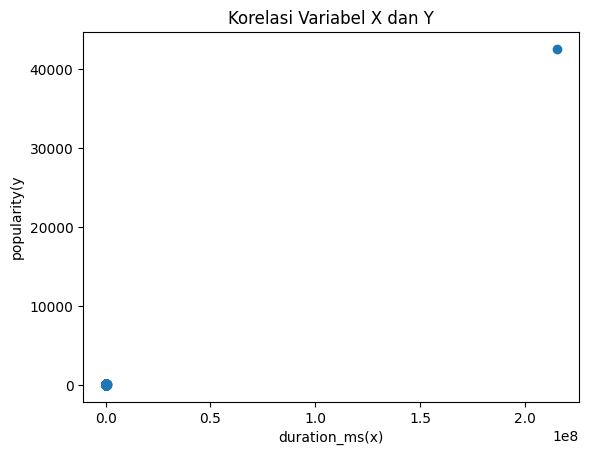

In [26]:
plt.title('Korelasi Variabel X dan Y')
plt.scatter(df5022['duration_ms(x)'] , df5022['popularity(y)'])
plt.xlabel('duration_ms(x)')
plt.ylabel('popularity(y')
plt.show()

In [30]:
np.corrcoef(df5022['duration_ms(x)'] , df5022['popularity(y)'])

array([[1.        , 0.99989123],
       [0.99989123, 1.        ]])

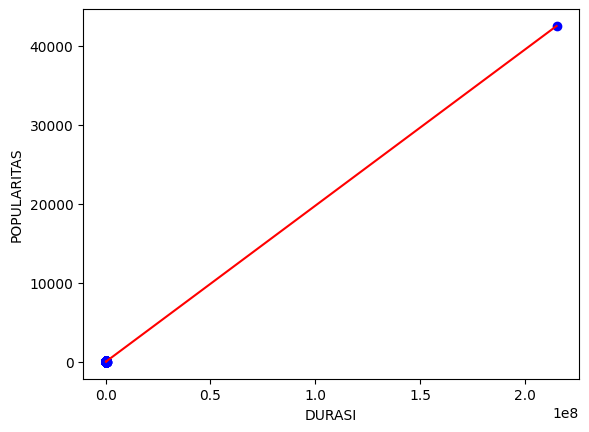

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('DURASI')
plt.ylabel('POPULARITAS')
plt.scatter(x,y, color='blue')
plt.plot(x, regr.predict(x.values.reshape(-1,1)), color='red')